In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip3 install --upgrade  git+https://github.com/ipazc/mtcnn.git

  Cloning https://github.com/ipazc/mtcnn.git to /tmp/pip-req-build-5f5ss69x
  Running command git clone -q https://github.com/ipazc/mtcnn.git /tmp/pip-req-build-5f5ss69x
  Created wheel for mtcnn: filename=mtcnn-0.1.0-cp36-none-any.whl size=2260370 sha256=6c055200dc0a5189d6bb189cd9f5beecd29400e816c5ac2b87804c2e28030381
  Stored in directory: /tmp/pip-ephem-wheel-cache-2y0e4jpx/wheels/ed/41/71/a9ae1b642532018974b4da9029f103ef47fa6892f098233755
Successfully built mtcnn


In [ ]:
# !pip3 install mtcnn
import cv2
# from mtcnn import MTCNN
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely.geometry import box
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint
!pip install keras-tuner
from albumentations import (PadIfNeeded,
HorizontalFlip,VerticalFlip,Transpose,HueSaturationValue,ElasticTransform,GridDistortion,
OpticalDistortion,RandomBrightnessContrast)
from kerastuner.tuners import RandomSearch
import IPython
import datetime
%env SM_FRAMEWORK=tf.keras

     |████████████████████████████████| 71kB 10.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78937 sha256=a1bfa9dbf42d87898030fa731d54a91e374740676c634e4520985476698e5399
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=f8d913ba1783df4d973754bee2e7ea386405bf161f004dd11b5ee302eed76d22
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables
env: SM_FRAMEWORK=tf.keras


# Data Preparation

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/My Drive/Kaggle"
%cd /content/drive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d wobotintelligence/face-mask-detection-dataset -p /content/drive/My\ Drive/data

100% 2.50G/2.50G [00:35<00:00, 114MB/s]
100% 2.50G/2.50G [00:35<00:00, 76.1MB/s]


In [ ]:
 !kaggle datasets download -d niharika41298/withwithout-mask -p /content/drive/My\ Drive/data

 84% 28.0M/33.5M [00:00<00:00, 53.3MB/s]
100% 33.5M/33.5M [00:00<00:00, 62.1MB/s]


In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset -p /content/drive/My\ Drive/data

100% 330M/330M [00:03<00:00, 104MB/s] 
100% 330M/330M [00:03<00:00, 91.8MB/s]


In [ ]:
!mkdir /content/data/

In [ ]:
!for z in /content/drive/My\ Drive/data/*.zip; do unzip -n "$z" -d /content/data/ ; done

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2096.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2097.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2098.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2099.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2100.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2101.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2102.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2103.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2104.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2106.jpg  
  inflating: /content/data/Medical mask/Medical mask/Medical Mask/images/2107.jpg  
  inflating: /content/dat

In [ ]:
!cp -R /content/drive/My\ Drive/with_mask /content/data/
!cp -R  /content/drive/My\ Drive/without_mask /content/data/

In [ ]:
!ls /content/data

'Face Mask Dataset'   masks2.0	      submission.csv   with_mask
 maskdata	     'Medical mask'   train.csv        without_mask


In [ ]:
base_dir="/content/data"
FaceMask_dir=os.path.join(base_dir,"Face Mask Dataset")
MedicakMask_dir=os.path.join(base_dir,"Medical mask","Medical mask","Medical Mask")
MaskData_dir=os.path.join(base_dir,"maskdata","maskdata")
Mask2_dir=os.path.join(base_dir,"masks2.0","masks")

In [ ]:
detector=MTCNN()
def mtcnn_(image):
  dt=detector.detect_faces(image)
  return dt


In [ ]:
def read(img):
  img_n=cv2.imread(img)
  return img_n

#### creating a dataframe that contains image properties and MTCNN results

In [ ]:
def create_df(*args,**kwargs):
  for key,value in kwargs.items():
    df_dict[key].append(value)

In [ ]:
df_dict={"img_path":[],"label":[],"MTCNN":[]}
def fld_(data_path):
  for fld in os.listdir(data_path):
    fld_path=os.path.join(data_path,fld)
    for fld in os.listdir(fld_path):
      fldMask_path=os.path.join(fld_path,fld)
      for image in os.listdir(fldMask_path):
        img_path=os.path.join(fldMask_path,image)
        mtcnn=mtcnn_(read(img_path))
        kwargs={"img_path":img_path,"label":fld,"MTCNN":mtcnn}
        create_df(**kwargs)

In [ ]:
fld_(FaceMask_dir)
fld_(MaskData_dir)
fld_(Mask2_dir)

In [ ]:
img_fld=os.path.join(MedicakMask_dir,"images")
for image in os.listdir(img_fld):
  img_path=os.path.join(img_fld,image)
  mtcnn=mtcnn_(read(img_path))
  kwargs={"img_path":img_path,"label":"","MTCNN":mtcnn}
  create_df(**kwargs)

In [ ]:
# df=pd.DataFrame(df_dict)
# df.to_csv("/content/drive/My Drive/oldfacemask_image.csv",index=False)

In [ ]:
# df=pd.DataFrame(df_dict)
# df.to_csv("/content/drive/My Drive/oldfacemask_image.csv",index=False)

In [ ]:
df=pd.read_csv("/content/drive/My Drive/oldfacemask_image.csv",converters={"MTCNN":eval})

In [ ]:
df.shape

(18755, 3)

In [ ]:
df.head(1)

,img_path,label,MTCNN
0,/content/data/Face Mask Dataset/Test/WithoutMa...,WithoutMask,"[{'box': [6, 0, 84, 106], 'confidence': 0.9669..."


#### removing null MTCNN

In [ ]:
df=df[df["MTCNN"].map(lambda x:len(x)>0)].reset_index(drop=True)
df.head(1)

,img_path,label,MTCNN
0,/content/data/Face Mask Dataset/Test/WithoutMa...,WithoutMask,"[{'box': [6, 0, 84, 106], 'confidence': 0.9669..."


In [ ]:
df.shape

(10588, 3)

for medical mask folder labels are in another train_csv file with bounding box, here we considering only MTCNN detected faces

In [ ]:
train_csv=pd.read_csv(base_dir+"/"+"train.csv")
train_csv.rename(columns={"name":"img_path"},inplace=True)
train_csv["img_path"]=train_csv["img_path"].map(lambda x:img_fld+"/"+x)
train_csv.head(1)

,img_path,x1,x2,y1,y2,classname
0,/content/data/Medical mask/Medical mask/Medica...,69,126,294,392,face_with_mask


some images have multiple faces in it.So we extract those bounding boxes for each detected faces

In [ ]:
train_csv=train_csv[train_csv["classname"].isin(["face_with_mask ","mask_surgical","mask_colorful","face_no_mask",
                                                
                                                "face_with_mask_incorrect"])]

In [ ]:
df_dict={"img_path":[],"box":[],"label":[],"confidence":[]}


In [ ]:
path_lst=df["img_path"].tolist()
label_lst=df["label"].tolist()
MTCNN_lst=df["MTCNN"].tolist()
for i in range(len(MTCNN_lst)):
  for j in range(len(MTCNN_lst[i])):
    box=MTCNN_lst[i][j]["box"]
    conf=MTCNN_lst[i][j]["confidence"]
    kwargs={"img_path":path_lst[i],"label":label_lst[i],"box":box,
           "confidence":conf}
    create_df(**kwargs)      
df=pd.DataFrame(df_dict)

In [ ]:
df.shape

(12070, 4)

adding labels to images in medical mask. Since there are multiple faces in single images we compare the obtained bounding box by MTCNN and given bounding box using IOU.Then rows with IOU>0.5 is extracted, and those labels are taken

In [ ]:
with_label=df[~df["label"].isna()] # images with labels
without_label=df[df["label"].isna()] #Medical mask images
without_label.reset_index(inplace=True,drop=True)
without_label.head(1)

,img_path,box,label,confidence
0,/content/data/Medical mask/Medical mask/Medica...,"[343, 34, 135, 171]",NaN,0.993797


In [ ]:
train_csv.shape

(6025, 6)

In [ ]:
without_label.shape

(4490, 4)

joining x1,x2,y1,y2 columns of train_csv

In [ ]:
train_csv["ground_truth"]=list(zip(train_csv.x1,train_csv.x2,train_csv.y1,train_csv.y2))

merging train_csv, df for comparing detected boxes and given boxes

In [ ]:
merged_df=pd.merge(train_csv[["img_path","ground_truth","classname"]],without_label[["img_path","box","confidence"]]
               ,on="img_path")

In [ ]:
merged_df["box"]=merged_df["box"].map(lambda x:tuple(i for i in x))

In [ ]:
merged_df.head(1)

,img_path,ground_truth,classname,box,confidence
0,/content/data/Medical mask/Medical mask/Medica...,"(75, 252, 264, 390)",mask_colorful,"(89, 177, 178, 203)",0.979969


In [ ]:
box_ls=merged_df["box"].tolist() # list of detected boxes
truth_ls=merged_df["ground_truth"].tolist() #list of ground truth boxes

In [ ]:
def IOU(box1, box2):
    iou = box1.intersection(box2).area / box1.union(box2).area
    return iou

In [ ]:
from shapely.geometry import box

In [ ]:
rslt=[]
for i in range(len(box_ls)):
  x1,y1,x2,y2=box_ls[i][0],box_ls[i][1],(box_ls[i][2])+(box_ls[i][0]),(box_ls[i][1])+(box_ls[i][3])
  p1=box(x1,y1,x2,y2)
  x11,y11,x12,y12=truth_ls[i][0],truth_ls[i][1],truth_ls[i][2],truth_ls[i][3]
  p2=box(x11,y11,x12,y12)
  rslt.append(IOU(p1,p2))

In [ ]:
merged_df["IOU"]=rslt
merged_df.head(1)

,img_path,ground_truth,classname,box,confidence,IOU
0,/content/data/Medical mask/Medical mask/Medica...,"(75, 252, 264, 390)",mask_colorful,"(89, 177, 178, 203)",0.979969,0.562588


In [ ]:
merged_df=merged_df[merged_df["IOU"].map(lambda x:x>=.5)]

In [ ]:
merged_df.reset_index(inplace=True,drop=True)
merged_df.rename(columns={"classname":"label"},inplace=True)

In [ ]:
merged_df.head(1)

,img_path,ground_truth,label,box,confidence,IOU
0,/content/data/Medical mask/Medical mask/Medica...,"(75, 252, 264, 390)",mask_colorful,"(89, 177, 178, 203)",0.979969,0.562588


In [ ]:

df=pd.concat([with_label,
              merged_df[["img_path","label","box","confidence"]]])

In [ ]:
df.head(1)

,img_path,box,label,confidence
0,/content/data/Face Mask Dataset/Test/WithoutMa...,"[6, 0, 84, 106]",WithoutMask,0.966915


In [ ]:
df.shape

(8574, 4)

In [ ]:
df.reset_index(inplace=True,drop=True)

removing poor prediction

In [ ]:
df=df[(df["confidence"]>=.88)]
df.reset_index(inplace=True,drop=True)

In [ ]:
df.shape

(7999, 4)

In [ ]:
df["box"]=df["box"].map(lambda x:tuple(i for i in x))

In [ ]:
df=df.drop_duplicates(subset=["img_path","box","confidence"])

maskdata and mask2.0 have duplicate image we will drop that

In [ ]:
map_dict={'WithoutMask':"with_out_mask", 'WithMask':"with_mask", 'with_mask':"with_mask", 'without_mask':"with_out_mask",
          '0':"with_out_mask", '1':"with_mask",
       'mask_colorful':"with_mask", 'face_no_mask':"with_out_mask", 'mask_surgical':"with_mask",
       "face_with_mask_incorrect":"with_out_mask"}
df["label"]=df["label"].map(map_dict)

In [ ]:
data=df[(df["img_path"].str.contains(MaskData_dir)) | (df["img_path"].str.contains(Mask2_dir))]
data1=df[~((df["img_path"].str.contains(MaskData_dir)) | (df["img_path"].str.contains(Mask2_dir)))]

In [ ]:
data["img"]=data["img_path"].apply(lambda x:x.split("/")[-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

,img_path,box,label,confidence,img
6598,/content/data/maskdata/maskdata/train/with_mas...,"(72, 114, 172, 202)",with_mask,0.967226,134-with-mask.jpg
6599,/content/data/maskdata/maskdata/train/with_mas...,"(86, 20, 91, 115)",with_mask,0.991543,460-with-mask.jpg
6600,/content/data/maskdata/maskdata/train/with_mas...,"(250, 204, 363, 414)",with_mask,0.997871,327-with-mask.jpg
6601,/content/data/maskdata/maskdata/train/with_mas...,"(109, 184, 48, 50)",with_mask,0.955446,309-with-mask.jpg
6602,/content/data/maskdata/maskdata/train/with_mas...,"(88, 110, 179, 209)",with_mask,0.912658,396-with-mask.jpg


In [ ]:
data=data.drop_duplicates(subset=["img","box","label","confidence"])

In [ ]:
data.drop("img",axis=1,inplace=True)
df=pd.concat([data,data1])
df.shape

(7944, 4)

In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
unq=df["label"].unique()

In [ ]:
unq

array(['with_mask', 'with_out_mask'], dtype=object)

In [ ]:
path_lst=[]
box_lst=[]
for i in unq:
  df1=df[df["label"]==i].reset_index(drop=True)
  path_lst1=df1["img_path"][0:2].tolist()
  box_lst1=df1["box"][0:2].tolist()
  path_lst.extend(path_lst1)
  box_lst.extend(box_lst1)



In [ ]:
def PlotImages(image_arr):
  fig,axes=plt.subplots(rows,cols,figsize=size)
  axes=axes.flatten()
  for img,ax in zip(image_arr,axes):
    ax.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    ax.axis("off")
  plt.tight_layout()
  plt.show() 

In [ ]:
def read_(img_path,img_box,img_lst1):
  for i in range(len(img_path)):
    img=cv2.imread(img_path[i])
    x,y,width,height=img_box[i][0],img_box[i][1],img_box[i][2],img_box[i][3]
    start_point=(x,y)
    end_point=(x+width,y+height)
    color=(255,0,0)
    image=cv2.rectangle(img,start_point,end_point,color)
    img_lst1.append(image)


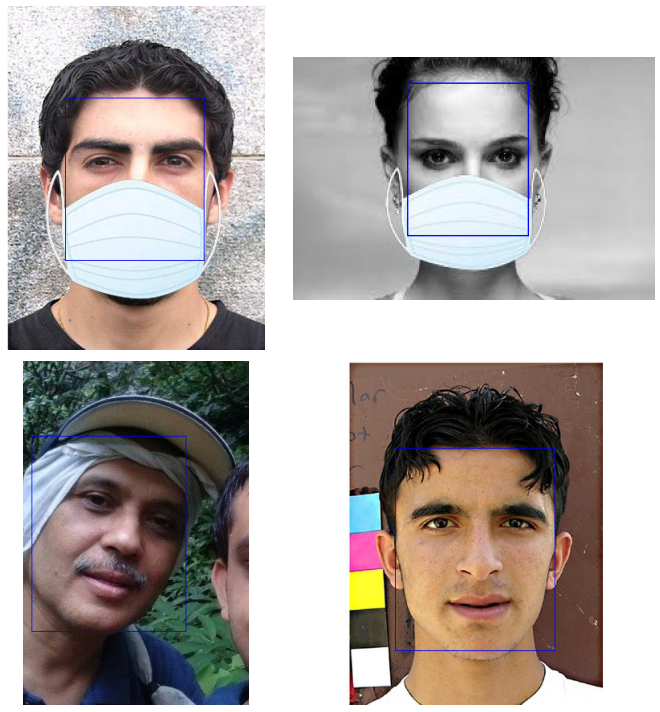

In [ ]:
cols=2
rows=2
size=(10,10)
img_lst1=[]
read_(path_lst,box_lst,img_lst1)
PlotImages(img_lst1)

###  now we will extract ROI

In [ ]:
!mkdir /content/ROI

In [ ]:
# !rm -r /content/ROI

We will extract faces only from images that detected mutltiple faces , by increasing height and width by 20 percentage

In [ ]:
df.head(1)

,img_path,box,label,confidence
0,/content/data/maskdata/maskdata/train/with_mas...,"(72, 114, 172, 202)",with_mask,0.967226


In [ ]:
df["nw_box"]=df["box"].apply(lambda x:(x[0],x[1],round(x[2]*1.2),round(x[3]*1.2)))

In [ ]:
def save_(img,label,img_path):
    file_name=path+str(count_)+".png"
    cv2.imwrite(file_name,img)
    file_lst.append(file_name)
    label_ls.append(label)
    path_ls.append(img_path)


In [ ]:
path="/content/ROI/"
except_lst=[]
file_lst=[]
label_ls=[]
path_ls=[]
count_=0
def ROI(img_path,box,label):
  global count_
  img=cv2.imread(img_path)
  x=box[0]
  y=box[1]
  w=box[2]
  h=box[3]  
  img=img[y:y+h,x:x+w]
  if (img.shape[0]>=20) & (img.shape[1]>=20):
    save_(img,label,img_path)
  else:
    except_lst.append(img_path)
  count_+=1
  

In [ ]:
img_path=df["img_path"].tolist()
box_lst=df["nw_box"].tolist()
label_lst=df["label"].tolist()
for i in range(len(img_path)):
  ROI(img_path[i],box_lst[i],label_lst[i])

In [ ]:
label_ls[0]

'with_mask'

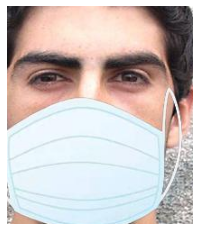

In [ ]:
img=cv2.imread(file_lst[0])
plt.axis("off")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [ ]:
roi_df=pd.DataFrame()

In [ ]:
roi_df["img_path"]=file_lst
roi_df["label"]=label_ls

In [ ]:
roi_df["img_shape"]=roi_df["img_path"].apply(lambda x:read(x).shape)

In [ ]:
height=roi_df["img_shape"].apply(lambda x:x[0]).value_counts()
width=roi_df["img_shape"].apply(lambda x:x[1]).value_counts()
channels=roi_df["img_shape"].apply(lambda x:x[2]).value_counts()

In [ ]:
fig=make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(x=height.index, y=height.values, name="height",width=60),row=1,col=1)
fig.add_trace(go.Bar(x=width.index, y=width.values, name="width",width=60),row=2,col=1)
fig.update_layout(width=1000,height=500)
fig.update_xaxes(type='category')
fig.show()

In [ ]:
roi_df["label"].value_counts()

with_out_mask    6278
with_mask        1664
Name: label, dtype: int64

Data augmentation

In [ ]:
x=roi_df[["img_path"]]
y=roi_df[["label"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train["label"]=y_train
x_test["label"]=y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x_train["label"].value_counts()

with_out_mask    5015
with_mask        1338
Name: label, dtype: int64

In [ ]:
df_dict={"img_path":[],"label":[]}
def save(img,img_path,method,label):
  global count
  if count<=count_max:
    file_path=img_path.replace(".png",method+".png")
    cv2.imwrite(file_path,img)
    count+=1
    kwargs={"img_path":file_path,"label":label}
    create_df(**kwargs)

In [ ]:
def augment(img_path,label):
  img=cv2.imread(img_path)
  transform = HorizontalFlip(p=1)
  image=transform(image=read(img_path))["image"]
  save(image,img_path,"HorizontalFlip",label)
  transform = VerticalFlip(p=1)
  image=transform(image=read(img_path))["image"]
  save(image,img_path,"VerticalFlip",label)
  transform=Transpose(p=1)
  image=transform(image=read(img_path))["image"]
  save(image,img_path,"transpose",label)
  transform=RandomBrightnessContrast(p=1,brightness_limit=0.5, contrast_limit=0.4)
  image=transform(image=read(img_path))["image"]
  save(image,img_path,"RandomBrightnessContrast",label)

In [ ]:
mask_ls=x_train[x_train["label"]=="with_mask"]["img_path"].tolist()
no_mask_ls=x_train[x_train["label"]=="with_out_mask"]["img_path"].tolist()

In [ ]:
count=1
count_max=4000
for i in mask_ls:
  augment(i,"with_mask")

In [ ]:
import random

In [ ]:
count,count_max=1,323
for i in random.sample(no_mask_ls,100):
  augment(i,"with_out_mask")


In [ ]:
x_mask1=pd.DataFrame(df_dict)

In [ ]:
x_train=pd.concat([x_train,x_mask1],ignore_index=True)

In [ ]:
x_train["label"].value_counts()

with_out_mask    5338
with_mask        5338
Name: label, dtype: int64

Model building

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
batch_size=32
img_height=96
img_width=96
base_model=MobileNetV2(input_shape=(img_height,img_width,3),include_top=False,weights="imagenet")
base_model.trainable=False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [ ]:
datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [ ]:
seed=42
train_image_generator=datagen.flow_from_dataframe(x_train,x_col="img_path",y_col="label",batch_size=batch_size,
                                                  target_size=(img_height,img_width),shuffle=True,
                                                  seed=seed,class_mode='categorical'
                                                  ,subset="training")
val_image_generator=datagen.flow_from_dataframe(x_train,x_col="img_path",y_col="label",batch_size=batch_size,
                                                  target_size=(img_height,img_width),shuffle=True,
                                                  seed=seed,class_mode='categorical'
                                                  ,subset="validation")

Found 8541 validated image filenames belonging to 2 classes.
Found 2135 validated image filenames belonging to 2 classes.


In [ ]:
batch_size=32
epochs=50
img_height=96
img_width=96

In [ ]:
flatten_layer=tf.keras.layers.GlobalAveragePooling2D()
dense_layer1=tf.keras.layers.Dense(256,activation="relu")
prediction_layer=tf.keras.layers.Dense(2,"softmax")
model=tf.keras.Sequential([base_model,flatten_layer,dense_layer1,prediction_layer])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3)
  ,loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
log_dir="/content/drive/My Drive/logs/tensor_board/vgg_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
filepath="/content/drive/My Drive/logs/tuner/best_1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True,mode="min",verbose=1)
callback_list=[tensorboard_callback,EarlyStopping(monitor="val_loss",patience=10),checkpoint]
history=model.fit(train_image_generator,steps_per_epoch=train_image_generator.samples//batch_size


                 ,epochs=epochs ,validation_data=val_image_generator,validation_steps=
                  val_image_generator.samples//batch_size,callbacks=callback_list,verbose=1)

Epoch 1/50
266/266 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9900
Epoch 00001: val_loss improved from inf to 0.04068, saving model to /content/drive/My Drive/logs/tuner/best_1.h5
266/266 [==============================] - 17s 63ms/step - loss: 0.0261 - accuracy: 0.9900 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 2/50
266/266 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9954
Epoch 00002: val_loss improved from 0.04068 to 0.03294, saving model to /content/drive/My Drive/logs/tuner/best_1.h5
266/266 [==============================] - 15s 58ms/step - loss: 0.0119 - accuracy: 0.9954 - val_loss: 0.0329 - val_accuracy: 0.9915
Epoch 3/50
265/266 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9980
Epoch 00003: val_loss did not improve from 0.03294
266/266 [==============================] - 15s 56ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0417 - val_accuracy: 0.9910
Epoch 4/50
266/266 [============

In [ ]:
datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
test_generator=datagen.flow_from_dataframe(x_test,x_col="img_path",y_col="label",batch_size=batch_size,
                                                  target_size=(img_height,img_width),shuffle=True,
                                                  seed=seed,class_mode='categorical')

Found 1589 validated image filenames belonging to 2 classes.


In [ ]:
from keras.models import load_model
model = load_model("/content/drive/My Drive/logs/tuner/best_1.h5")

In [ ]:
results = model.evaluate(test_generator, batch_size=100)
print("test loss, test acc:", results)


50/50 [==============================] - 2s 37ms/step - loss: 0.0363 - accuracy: 0.9906
test loss, test acc: [0.03626690432429314, 0.9905601143836975]
